In [15]:
import itertools
import psutil
import time
import sys, os
import subprocess
import numpy
import matplotlib.pyplot as plt
import threading
import datetime
from IPython import display
import csv
from multiprocessing import Process
import errno
from os import path

class DTNMonitor:

    def __init__(self):
        self.network_monitor_list = numpy.array([], dtype=float)
        self.diskio_monitor_list = numpy.array([], dtype=float)
        self.cup_monitor_list = numpy.array([], dtype=float)
        self.mem_monitor_list = numpy.array([], dtype=float)
        self.interface = "all"
        
    def monitor_bandwidth(self):
        max_graph_point = 100
        old_value = 0
        disk_old_value = 0
        count = 0
        
        while self.running:
            if self.interface == "all":
                new_value = psutil.net_io_counters().bytes_sent + psutil.net_io_counters().bytes_recv
            else:
                new_value = psutil.net_io_counters(pernic=True)[interface].bytes_sent + psutil.net_io_counters(pernic=True)[interface].bytes_recv

            disk_new_value = psutil.disk_io_counters().write_bytes + psutil.disk_io_counters().read_bytes
            
            if old_value == 0 :
                net = float(0)
                disk = float(0)
            else:
                net = float(convert_to_mbit(new_value - old_value))
                disk = float(convert_to_mbyte(disk_new_value - disk_old_value))
            
            cpu = float(psutil.cpu_percent())
            mem = float(psutil.virtual_memory().percent)
            
            if count > 100:
                self.network_monitor_list = numpy.delete(self.network_monitor_list, 99)
                self.diskio_monitor_list = numpy.delete(self.diskio_monitor_list, 99)
                self.cup_monitor_list = numpy.delete(self.cup_monitor_list, 99)
                self.mem_monitor_list = umpy.delete(self.mem_monitor_list, 99)

            self.network_monitor_list= numpy.append(self.network_monitor_list, net)
            self.diskio_monitor_list = numpy.append(self.diskio_monitor_list, disk)
            self.cup_monitor_list = numpy.append(self.cup_monitor_list, cpu)
            self.mem_monitor_list = numpy.append(self.mem_monitor_list, mem)
                
            count = count + 1
            old_value = new_value
            disk_old_value = disk_new_value
            time.sleep(1)
            
    def draw_graph(self):
        while self.running:
            
            netarr = self.network_monitor_list
            diskarr = self.diskio_monitor_list
            cpuarr = self.cup_monitor_list
            memarr = self.mem_monitor_list

            f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')
            f.set_size_inches(15, 10)

            ax1.plot(((netarr )))
            ax1.grid(alpha=0.5)
            ax1.set_title("Network Performance")
            ax1.set_xlabel('Sec')
            ax1.set_ylabel('Mb')

            ax2.plot(((diskarr )), color="green")
            ax2.grid(alpha=0.5)
            ax2.set_title("DISK IO")
            ax2.set_xlabel('Sec')
            ax2.set_ylabel('MB')

            ax3.plot(((cpuarr)))
            ax3.grid(alpha=0.5)
            ax3.set_title("CPU Usage")
            ax3.set_xlabel('Sec')
            ax3.set_ylabel('Percentage')

            ax4.plot(((memarr)))
            ax4.grid(alpha=0.5)
            ax4.set_title("Memory Usage")
            ax4.set_xlabel('Sec')
            ax4.set_ylabel('Percentage')

            display.display(plt.show())
            display.clear_output(wait=True)
            time.sleep(1)

    def stop(self):
        self.running = False
    
    def run_monitor(self):
        self.running=True
        m_thread = threading.Thread(target=self.monitor_bandwidth)
        m_thread.start()

        g_thread = threading.Thread(target=self.draw_graph)
        g_thread.start()
        
def convert_to_mbyte(value):
    return (value / 1024. / 1024.)

def convert_to_mbit(value):
    return (value * 8 / 1024. / 1024. )

def send_stat(value):
    return convert_to_gbit(value)

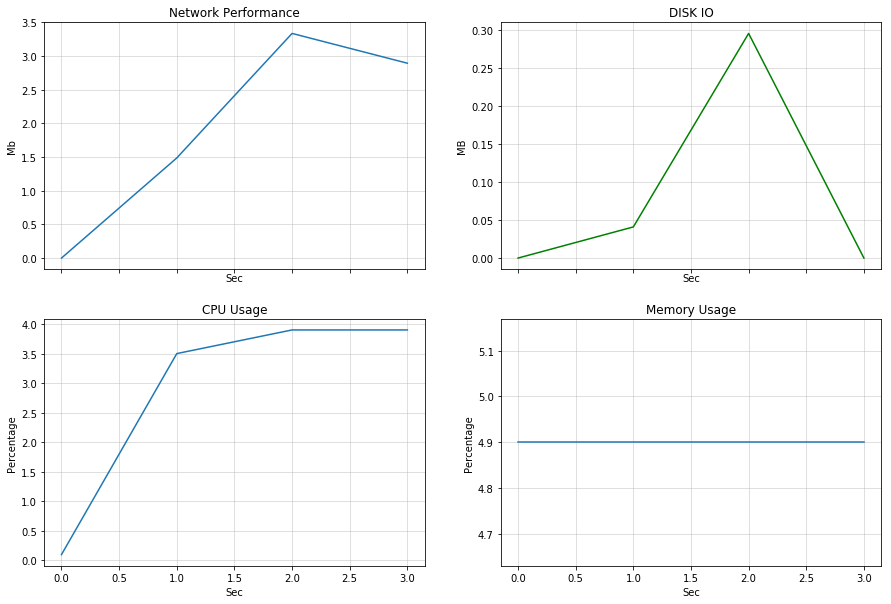

None

In [16]:
test = DTNMonitor()
test.run_monitor()

In [ ]:
print(test.network_monitor_list)

In [17]:
test.stop()